In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np

from PIL import Image, ImageOps
import os

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, Reshape, GlobalAveragePooling1D

from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
X_train = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_X.npy')
y_train = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_y.npy')

In [ ]:
eval_a_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Evaluation/eval_a_X.npy')
eval_b_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Evaluation/eval_b_X.npy')

In [ ]:
display(eval_a_X.shape)
display(eval_b_X.shape)

(2790, 6, 3000)

(2728, 6, 3000)

In [ ]:
train_path = '/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training'

# List of patterns to include
include_patterns = ['p00', 'p01', 'p02']

# Dictionary to hold your data
data = {}

# Iterate through each file in the directory
for file in os.listdir(train_path):
    if file.endswith('.npy') and any(pattern in file for pattern in include_patterns):
        # Construct the full file path
        file_path = os.path.join(train_path, file)

        # Load the .npy file
        data[file.split('.')[0]] = np.load(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training'

In [ ]:
from collections import Counter

# Find the count of the next most frequent class
class_distribution = Counter(X_train)
most_common_classes = class_distribution.most_common()
next_most_common_count = most_common_classes[1][1]

# Number of samples to keep from class '1'
n_samples_to_keep = next_most_common_count
# Indices of class '1' and other classes
indices_class_1 = np.where(y == 1)[0]
indices_other_classes = np.where(y != 1)[0]

# Randomly select samples from class '1'
np.random.shuffle(indices_class_1)
indices_class_1_downsampled = indices_class_1[:n_samples_to_keep]

# Combine and shuffle indices
downsampled_indices = np.concatenate([indices_class_1_downsampled, indices_other_classes])
np.random.shuffle(downsampled_indices)

# Create the downsampled dataset
X_downsampled = X[downsampled_indices]
y_downsampled = y[downsampled_indices]

# Checking the new distribution
new_class_distribution = Counter(y_downsampled)
print("Class Distribution after under-sampling:", new_class_distribution)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
p00_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_X.npy')
p00_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_y.npy')
p00_n2_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_X.npy')
p00_n2_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_y.npy')

In [ ]:
input_shape = (6, 3000)  # Modify as needed

model = Sequential()

# Adjusted first convolutional layer with padding
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Adjusted second convolutional layer with padding
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and LSTM layers remain the same
model.add(Flatten())

# Reshape the data before passing it to the LSTM layer
model.add(Reshape((128, 1)))

model.add(LSTM(100, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for sleep stages

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 6, 64)             576064    
                                                                 
 max_pooling1d_35 (MaxPooli  (None, 3, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_43 (Conv1D)          (None, 3, 128)            24704     
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 1, 128)            0         
 ng1D)                                                           
                                                                 
 flatten_30 (Flatten)        (None, 128)               0         
                                                                 
 reshape_1 (Reshape)         (None, 128, 1)          

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def load_and_preprocess(file_x, file_y):
    # Load data
    X = np.load(file_x)
    y = np.load(file_y)

    # Reshape X if necessary (depends on your model's input requirements)
    # For example, if using a CNN with channels last, you might reshape like so:
    # X = X.transpose((0, 2, 1))

    # Normalize data
    # Flatten the epochs and channels for normalization then reshape back
    original_shape = X.shape
    X_flattened = X.reshape(-1, X.shape[-1])
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X_flattened)
    X = X_normalized.reshape(original_shape)

    return X, y

# Example usage
X_p1, y_p1 = load_and_preprocess('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_X.npy', '/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_y.npy')
X_p2, y_p2 = load_and_preprocess('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_X.npy', '/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_y.npy')
# ... Load more datasets as required


In [ ]:
# Combine the data
X_combined = np.concatenate([X_p1, X_p2], axis=0)  # Add more datasets as required
y_combined = np.concatenate([y_p1, y_p2], axis=0)  # Similarly, concatenate the labels

# Shuffle the combined data to ensure good mixing
# It's important to shuffle both features and labels in unison
perm = np.random.permutation(len(X_combined))
X_combined = X_combined[perm]
y_combined = y_combined[perm]

In [ ]:
X_combined.shape

(5452, 6, 3000)

In [ ]:
X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_y.npy')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# For detailed classification metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_classes))

171/171 [==============================] - 5s 26ms/step - loss: 18.1216 - accuracy: 0.2621
Test Loss: 18.121625900268555
Test Accuracy: 0.26210564374923706
171/171 [==============================] - 2s 14ms/step


AxisError: axis 2 is out of bounds for array of dimension 1

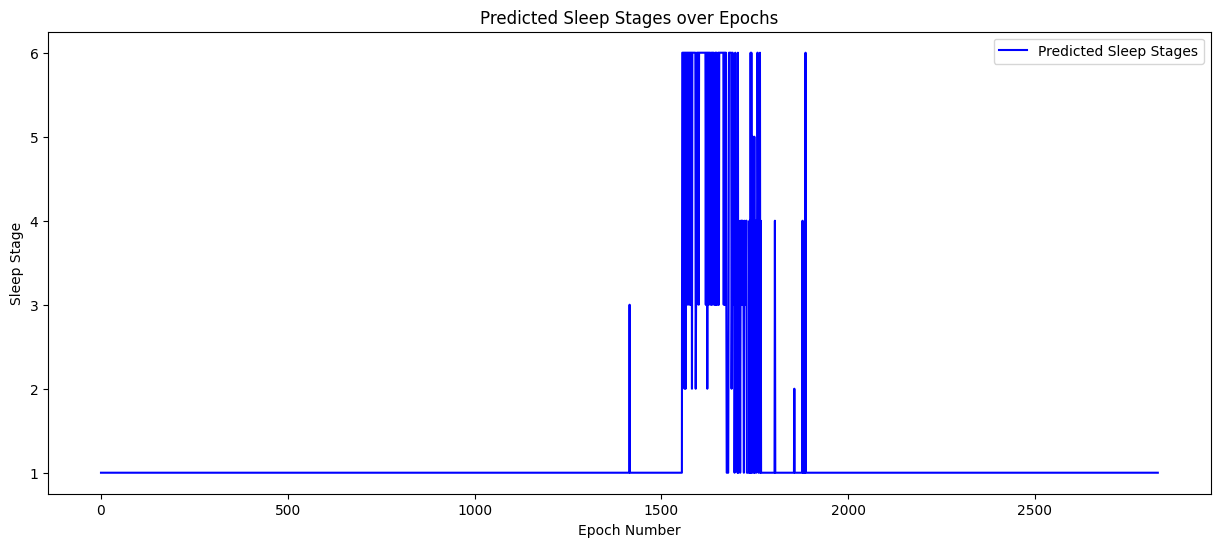

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred_classes))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred_classes, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
# Load data
p00_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_X.npy')
p00_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p00_n1_NEW_y.npy')
p01_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p01_n1_NEW_X.npy')
p01_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p01_n1_NEW_y.npy')
# p02_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p02_n1_NEW_X.npy')
# p02_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p02_n1_y.npy')
# p03_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p03_n1_X.npy')
# p03_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p03_n1_y.npy')
# p04_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p04_n1_X.npy')
# p04_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p04_n1_y.npy')
# p05_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p05_n1_X.npy')
# p05_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p05_n1_y.npy')
# p06_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p06_n1_X.npy')
# p06_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p06_n1_y.npy')
# p07_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p07_n1_X.npy')
# p07_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p07_n1_y.npy')

datasets = [(p00_n1_X[:, 3:6, :], p00_n1_y), (p01_n1_X[:, 3:6, :], p01_n1_y)]

# datasets = [(p00_n1_X, p00_n1_y), (p01_n1_X, p01_n1_y), (p02_n1_X, p02_n1_y),(p03_n1_X, p03_n1_y),(p04_n1_X, p04_n1_y),(p05_n1_X, p05_n1_y),(p06_n1_X, p06_n1_y), (p07_n1_X, p07_n1_y)]

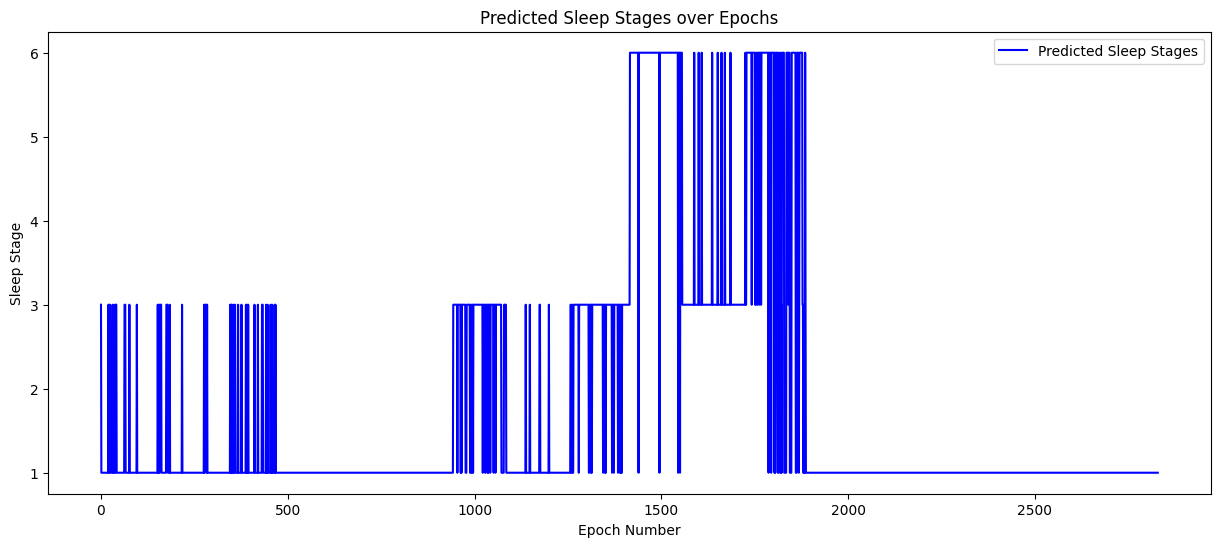

In [ ]:
# # Assuming y_pred is the array of predicted sleep stages from your Random Forest model
# # And assuming epochs is a sequence of epoch indices corresponding to y_pred
# epochs = range(len(y_pred))

# # Create a line plot
# plt.figure(figsize=(15, 5))  # Set the figure size to be large enough to see details
# plt.plot(epochs, y_pred, label='Predicted Sleep Stages', color='blue', marker='o', linestyle='-', markersize=3)
# plt.xlabel('Epoch Number')
# plt.ylabel('Predicted Sleep Stage')
# plt.title('Predicted Sleep Stages over Epochs')
# plt.legend()
# plt.grid(True)  # Optional: Add grid for better readability
# plt.tight_layout()  # Adjust the padding of the plot
# plt.show()
# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
for i, (X_downsampled, y_downsampled) in enumerate(datasets):
    print(f"Training on dataset {i+1}...")
    model = create_model()

    # Train the model
    model.fit(X_downsampled, y_downsampled, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_downsampled, y_downsampled)
    print(f"Dataset {i+1} - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Training on dataset 1...
Epoch 1/10
23/23 [==============================] - 2s 34ms/step - loss: 186.7227 - accuracy: 0.3864 - val_loss: 185.5061 - val_accuracy: 0.2983
Epoch 2/10
23/23 [==============================] - 1s 22ms/step - loss: 87.3526 - accuracy: 0.5069 - val_loss: 115.5930 - val_accuracy: 0.4807
Epoch 3/10
23/23 [==============================] - 0s 21ms/step - loss: 63.9424 - accuracy: 0.5222 - val_loss: 141.1443 - val_accuracy: 0.2597
Epoch 4/10
23/23 [==============================] - 0s 18ms/step - loss: 57.1452 - accuracy: 0.5388 - val_loss: 219.5644 - val_accuracy: 0.4696
Epoch 5/10
23/23 [==============================] - 1s 22ms/step - loss: 40.8802 - accuracy: 0.5554 - val_loss: 88.0346 - val_accuracy: 0.4807
Epoch 6/10
23/23 [==============================] - 1s 24ms/step - loss: 29.7314 - accuracy: 0.5997 - val_loss: 105.0352 - val_accuracy: 0.4475
Epoch 7/10
23/23 [==============================] - 0s 21ms/step - loss: 26.5465 - accuracy: 0.6150 - val_loss:

In [ ]:
X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]/p09_n1_NEW_y.npy')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test[:, 3:6, :], y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = model.predict(X_test[:, 3:6, :])
y_pred_classes = np.argmax(y_pred, axis=1)  # Corrected line

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_classes))

86/86 [==============================] - 1s 7ms/step - loss: 105.7134 - accuracy: 0.6266
Test Loss: 105.71341705322266
Test Accuracy: 0.6266471743583679
86/86 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

         1.0       0.65      0.95      0.77      1739
         2.0       0.00      0.00      0.00        19
         3.0       0.44      0.09      0.15       567
         4.0       0.05      0.01      0.02        89
         5.0       0.00      0.00      0.00        83
         6.0       0.04      0.00      0.01       235

    accuracy                           0.63      2732
   macro avg       0.20      0.18      0.16      2732
weighted avg       0.51      0.63      0.52      2732

[[1659    4   54    9    2   11]
 [  18    0    0    1    0    0]
 [ 487    9   51    7    0   13]
 [  77    0   10    1    0    1]
 [  81    0    0    2    0    0]
 [ 233    0    1    0    0    1]]


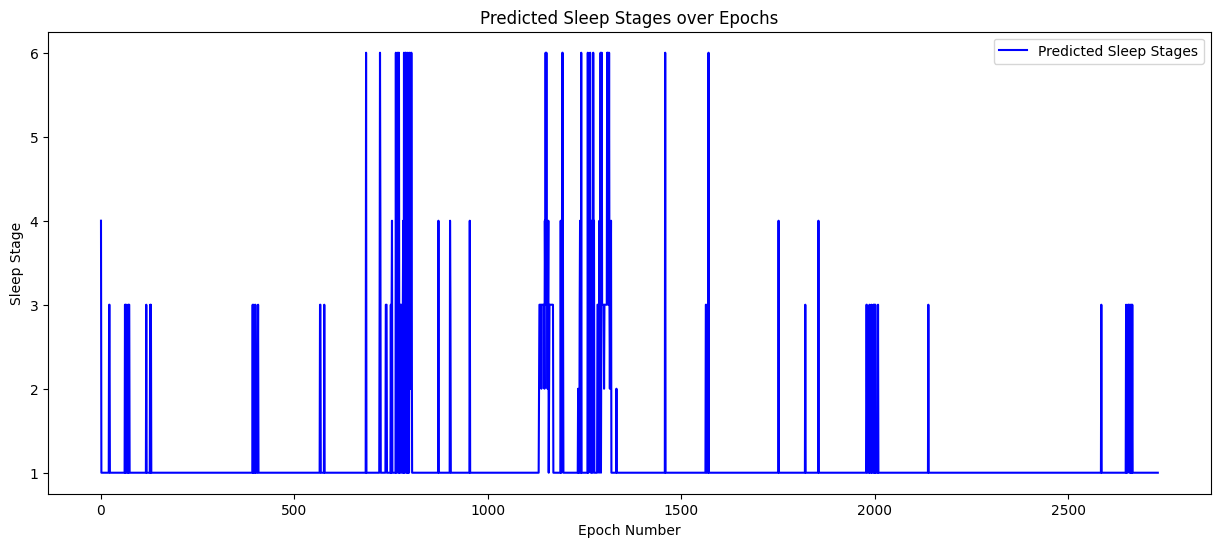

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred_classes))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred_classes, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
# Load data
p00_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_X.npy')
p00_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n1_y.npy')
p01_n1_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_X.npy')
p01_n1_y = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p01_n1_y.npy')

datasets = [(p00_n1_X, p00_n1_y), (p01_n1_X, p01_n1_y)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
for i, (X, y) in enumerate(datasets):
    print(f"Training on dataset {i+1}...")
    # Flatten the X array to 2D for Random Forest
    X_flattened = X.reshape(X.shape[0], -1)

    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_clf.fit(X_flattened, y)

    # Predict on the same dataset (usually you would have a separate test set)
    y_pred = rf_clf.predict(X_flattened)

    # Print accuracy and classification report
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy on dataset {accuracy}')
    print(classification_report(y, y_pred))


Training on dataset 1...
Accuracy on dataset 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1997
         2.0       1.00      1.00      1.00        58
         3.0       1.00      1.00      1.00       250
         4.0       1.00      1.00      1.00       101
         5.0       1.00      1.00      1.00       119
         6.0       1.00      1.00      1.00       125

    accuracy                           1.00      2650
   macro avg       1.00      1.00      1.00      2650
weighted avg       1.00      1.00      1.00      2650

Training on dataset 2...
Accuracy on dataset 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1856
         2.0       1.00      1.00      1.00       109
         3.0       1.00      1.00      1.00       562
         4.0       1.00      1.00      1.00        96
         5.0       1.00      1.00      1.00         9
         6.0       1.00      1.00 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_X.npy')
y_test = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training/p00_n2_y.npy')

# Preprocess test data (the same way you preprocessed training data)
# If your test data is 3D (N x Channels x Time), you need to flatten it to 2D (N x Features)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Predict using the trained model
y_pred = rf_clf.predict(X_test_flattened)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7088339222614841
              precision    recall  f1-score   support

         1.0       0.86      0.95      0.90      1885
         2.0       0.00      0.00      0.00        59
         3.0       0.28      0.37      0.32       373
         4.0       0.00      0.00      0.00        94
         5.0       0.00      0.00      0.00       204
         6.0       0.32      0.39      0.35       215

    accuracy                           0.71      2830
   macro avg       0.24      0.28      0.26      2830
weighted avg       0.63      0.71      0.67      2830

[[1785    0   89    0    0   11]
 [  13    0   27    0    0   19]
 [ 115    0  137    0    0  121]
 [  42    0   40    0    0   12]
 [  64    0  128    0    0   12]
 [  59    0   72    0    0   84]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


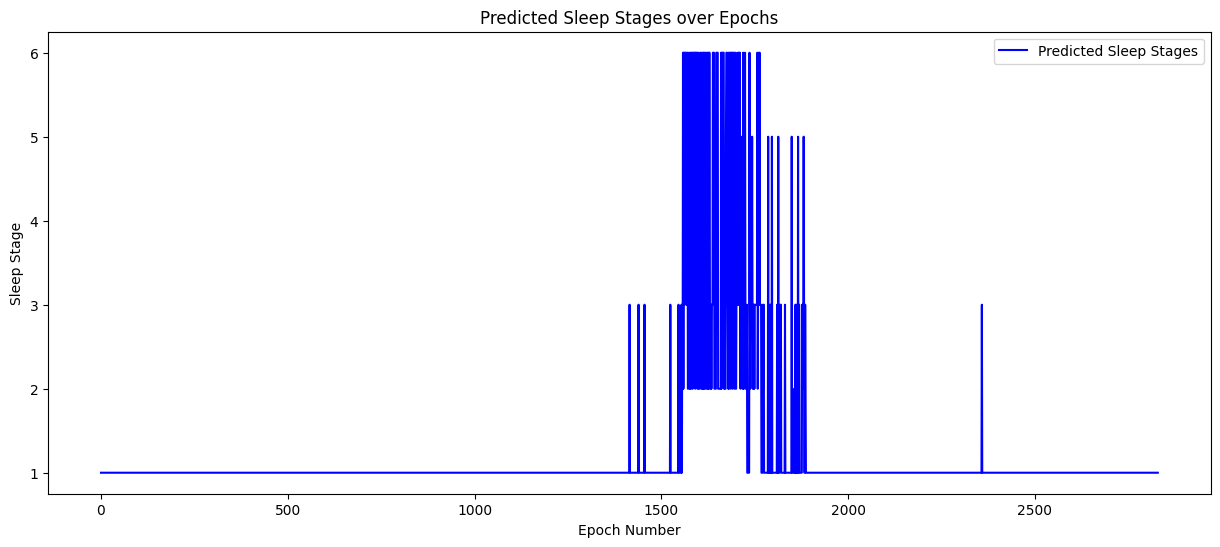

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_classes is your array of predicted sleep stages
# And let's say you have an array of epoch numbers corresponding to these predictions
epochs = range(len(y_pred_classes))

# Create a line plot
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(epochs, y_pred_classes, label='Predicted Sleep Stages', color='b')
plt.xlabel('Epoch Number')
plt.ylabel('Sleep Stage')
plt.title('Predicted Sleep Stages over Epochs')
plt.legend()
plt.show()

In [ ]:
data_sets = [(p00_n1_X, p00_n1_y), (p00_n2_X, p00_n2_y)]

model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())  # This layer will help in reducing the output to a one-dimensional array
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Output layer for 7 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for X, y in data_sets:
    # Normalize X
    X = X / np.max(X)

    # Train the model on each set
    model.fit(X, y, epochs=30, batch_size=32)


Epoch 1/30
83/83 [==============================] - 2s 14ms/step - loss: 1.2969 - accuracy: 0.7404
Epoch 2/30
83/83 [==============================] - 1s 14ms/step - loss: 0.8307 - accuracy: 0.7766
Epoch 3/30
83/83 [==============================] - 2s 21ms/step - loss: 0.7636 - accuracy: 0.7823
Epoch 4/30
83/83 [==============================] - 2s 20ms/step - loss: 0.7281 - accuracy: 0.7857
Epoch 5/30
83/83 [==============================] - 2s 21ms/step - loss: 0.7055 - accuracy: 0.7913
Epoch 6/30
83/83 [==============================] - 1s 18ms/step - loss: 0.7071 - accuracy: 0.7925
Epoch 7/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6943 - accuracy: 0.7977
Epoch 8/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6812 - accuracy: 0.8000
Epoch 9/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6816 - accuracy: 0.7989
Epoch 10/30
83/83 [==============================] - 1s 14ms/step - loss: 0.6815 - accuracy: 0.7977
Epoch 11/

In [ ]:
predictions = model.predict(eval_b_X)

86/86 [==============================] - 0s 5ms/step


In [ ]:
p00_n1_X = train_arrays[0]
display(p00_n1_X)

array([1., 1., 1., ..., 1., 1., 1.])